In [1611]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
X_train=torch.tensor(pd.read_csv('data/X_train_dec.csv').values, dtype=torch.float32).unsqueeze(1).transpose(0,1)
X_test=torch.tensor(pd.read_csv('data/X_test_dec.csv').values,dtype=torch.float32).unsqueeze(1).transpose(0,1)
y_train=torch.tensor(pd.read_csv('data/y_train_dec.csv').values,dtype=torch.float32).unsqueeze(0)
y_test=pd.read_csv('data/y_test_dec.csv')

In [1612]:
X_train.shape,y_train.shape

(torch.Size([1, 6519, 32]), torch.Size([1, 6519, 1]))

In [1613]:
X_test.shape,y_test.shape

(torch.Size([1, 159, 32]), (159, 1))

In [1614]:
# Define your RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        diff = self.fc(out)
        # diff = out[:, :, 1] - out[:, :,0]
        # diff = diff.transpose(1,0).unsqueeze(0) 
        out = self.sigmoid(diff)
        return out


# Define hyperparameters
input_size = 32
hidden_size = 128
output_size = 1
learning_rate = 0.01
num_epochs =300
# Create DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=30, shuffle=False)

# Initialize model, loss function, and optimizer
model = RNN(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/300], Loss: 0.7139
Epoch [2/300], Loss: 0.6771
Epoch [3/300], Loss: 0.6556
Epoch [4/300], Loss: 0.6366
Epoch [5/300], Loss: 0.6418
Epoch [6/300], Loss: 0.6338
Epoch [7/300], Loss: 0.6350
Epoch [8/300], Loss: 0.6324
Epoch [9/300], Loss: 0.6324
Epoch [10/300], Loss: 0.6322
Epoch [11/300], Loss: 0.6313
Epoch [12/300], Loss: 0.6313
Epoch [13/300], Loss: 0.6302
Epoch [14/300], Loss: 0.6294
Epoch [15/300], Loss: 0.6293
Epoch [16/300], Loss: 0.6286
Epoch [17/300], Loss: 0.6280
Epoch [18/300], Loss: 0.6279
Epoch [19/300], Loss: 0.6273
Epoch [20/300], Loss: 0.6268
Epoch [21/300], Loss: 0.6263
Epoch [22/300], Loss: 0.6258
Epoch [23/300], Loss: 0.6253
Epoch [24/300], Loss: 0.6248
Epoch [25/300], Loss: 0.6246
Epoch [26/300], Loss: 0.6239
Epoch [27/300], Loss: 0.6232
Epoch [28/300], Loss: 0.6230
Epoch [29/300], Loss: 0.6223
Epoch [30/300], Loss: 0.6217
Epoch [31/300], Loss: 0.6211
Epoch [32/300], Loss: 0.6200
Epoch [33/300], Loss: 0.6190
Epoch [34/300], Loss: 0.6183
Epoch [35/300], Loss: 0

In [1615]:
model.eval()
with torch.no_grad():
    y_pred= model(X_train)
    y_pred = (y_pred.squeeze().detach().numpy() > 0.5).astype(int)
accuracy_score(y_pred ,y_train.squeeze().detach().numpy())

0.8285013038809633

In [1616]:
model.eval()
with torch.no_grad():
    y_pred_t= model(X_test)
    y_pred_t = pd.DataFrame((y_pred_t.squeeze().detach().numpy() > 0.5).astype(int))
accuracy_score(y_pred_t,y_test)

0.7295597484276729

In [1617]:
for k,v in model.named_parameters():
    print(k,v)

rnn.weight_ih_l0 Parameter containing:
tensor([[-0.1353, -0.0943,  0.2866,  ...,  0.4465, -0.2264,  0.0289],
        [ 0.0487,  0.1014,  0.0301,  ...,  0.0936, -0.1073, -0.0125],
        [ 0.0559, -0.0172,  0.0977,  ...,  0.0340,  0.1459,  0.0127],
        ...,
        [ 0.1518,  0.0951, -0.2914,  ..., -0.4725, -0.1043, -0.1431],
        [ 0.0303, -0.1685,  0.1610,  ..., -0.8117,  0.0392,  0.2270],
        [ 0.0967,  0.0316,  0.1310,  ..., -0.5146,  0.0132, -0.1133]],
       requires_grad=True)
rnn.weight_hh_l0 Parameter containing:
tensor([[ 0.1813,  0.1304,  0.0357,  ..., -0.0688,  0.3138, -0.2256],
        [-0.0566,  0.1358,  0.0070,  ...,  0.0340,  0.0241,  0.0261],
        [-0.0408,  0.1363,  0.0916,  ...,  0.0032,  0.1240, -0.0215],
        ...,
        [ 0.0568, -0.0241, -0.0107,  ..., -0.6539, -0.0734, -0.0016],
        [-0.3281, -0.0177, -0.0245,  ..., -0.2119,  0.3780,  0.2982],
        [-0.1280, -0.1577, -0.0832,  ..., -0.1146, -0.0354,  1.3986]],
       requires_grad=True)


In [1627]:
X_test_=torch.tensor(pd.read_csv('data/X_test_dec.csv').values,dtype=torch.float32).unsqueeze(1).transpose(0,1)
X_test_zero=torch.tensor(pd.read_csv('data/X_test_dec_zero.csv').values,dtype=torch.float32).unsqueeze(1).transpose(0,1)
y_test_=torch.tensor(pd.read_csv('data/y_test_dec.csv').values,dtype=torch.float32).unsqueeze(0)
train_data = TensorDataset(X_test_, y_test_)
train_loader = DataLoader(train_data, batch_size=30, shuffle=False)
train_data_zero = TensorDataset(X_test_zero, y_test_)
train_loader_zero = DataLoader(train_data_zero, batch_size=5, shuffle=False)
model.eval()
with torch.no_grad():
    for i, j in train_loader:
        factor = model.fc(model.rnn(i)[0])
    for i, j in train_loader_zero:
        influence_x1 = model.fc(model.rnn(i)[0])
    p = model(X_test_)
    label = (p.squeeze().detach().numpy() > 0.5).astype(int)
    label = pd.DataFrame(label,columns=['predict_label'])
    factor = pd.DataFrame(factor.squeeze().numpy(), columns=['factor'])
    p = pd.DataFrame(p.squeeze().numpy(), columns=['probability'])
    influence_x1 = pd.DataFrame(influence_x1.squeeze().numpy(),columns =['influence_x1'])
    y_test_ = pd.DataFrame(y_test_.squeeze().numpy(),columns=['label'])
    temp = pd.concat([factor,influence_x1,p,label,y_test_],axis=1)
    temp['performance'] = temp.factor - temp.influence_x1
temp

factor  influence_x1  probability  predict_label  label  performance
0    0.844314      0.751141     0.699373              1    1.0     0.093173
1    1.307268      2.099980     0.787056              1    1.0    -0.792712
2    3.312883      5.373148     0.964868              1    1.0    -2.060265
3    3.080139      5.839165     0.956066              1    1.0    -2.759027
4   -0.949875      1.185179     0.278910              0    0.0    -2.135054
..        ...           ...          ...            ...    ...          ...
154  1.726526      8.832187     0.848967              1    1.0    -7.105661
155  3.454330      8.839580     0.969360              1    1.0    -5.385249
156  2.657247      8.839185     0.934456              1    0.0    -6.181938
157  3.256269      8.837481     0.962898              1    1.0    -5.581213
158  2.825669      8.832794     0.944047              1    1.0    -6.007125

[159 rows x 6 columns]

In [1628]:
temp.to_csv('data/result_1601.csv',index=False)

<Axes: >

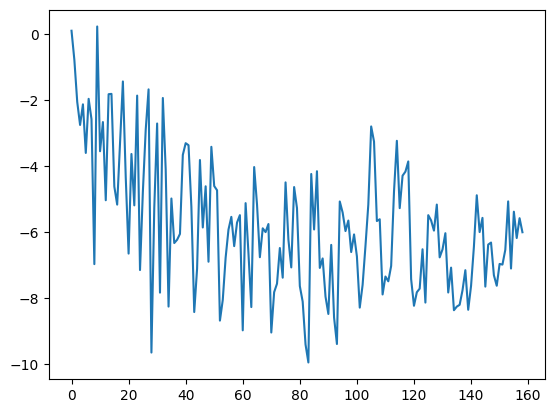

In [1629]:
temp.performance.plot()